In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
df = pd.read_pickle('final.pkl')
df

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,...,QC for Reference ETo,Reference ETo,QC for Average Relative Humidity,Average Relative Humidity,QC for Dew Point,Dew Point,QC for Wind Run,Wind Run,Year,DOY
0,2005,33,1300.0,9.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,...,*,0.03,*,94,*,20.7,*,63.8,2005,33
1,2004,133,845.0,1.0,Lightning,133.0,1530.0,0.25,A,38.933056,...,*,0.23,*,44,*,35.2,*,124.1,2004,133
2,2004,133,1400.0,2.0,Equipment Use,133.0,1430.0,0.10,A,38.696111,...,*,0.23,*,44,*,35.2,*,124.1,2004,133
3,2004,133,1800.0,5.0,Debris Burning,133.0,1920.0,0.10,A,38.325833,...,*,0.23,*,44,*,35.2,*,124.1,2004,133
4,2004,152,1921.0,5.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,...,*,0.26,*,40,*,45.5,*,135.6,2004,152
5,2004,152,925.0,5.0,Debris Burning,152.0,1000.0,0.10,A,38.934722,...,*,0.26,*,40,*,45.5,*,135.6,2004,152
6,2004,152,1300.0,9.0,Miscellaneous,152.0,1352.0,0.10,A,38.633331,...,*,0.26,*,40,*,45.5,*,135.6,2004,152
7,2004,152,1340.0,9.0,Miscellaneous,152.0,1352.0,0.50,B,38.649619,...,*,0.26,*,40,*,45.5,*,135.6,2004,152
8,2004,152,1341.0,9.0,Miscellaneous,152.0,1408.0,0.10,A,38.661000,...,*,0.26,*,40,*,45.5,*,135.6,2004,152
9,2004,180,1600.0,1.0,Lightning,185.0,1400.0,0.10,A,38.559167,...,*,0.25,*,46,*,50.9,*,106.2,2004,180


In [3]:
df = df[['LATITUDE', 'LONGITUDE', 'Solar Radiation Average', 'Average Soil Temperature', 'Average Air Temperature', 
        'Average Vapor Pressure', 'Average Wind Speed', 'Precipitation', 'Average Relative Humidity', 'FIRE_SIZE_CLASS']]
df = df.convert_objects(convert_numeric=True)
df.head()

C:\Users\hkthe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,LATITUDE,LONGITUDE,Solar Radiation Average,Average Soil Temperature,Average Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Average Relative Humidity,FIRE_SIZE_CLASS
0,40.036944,-121.005833,177.0,34.6,22.3,3.8,2.6,0.0,94.0,A
1,38.933056,-120.404444,699.0,66.5,57.1,7.0,5.1,0.0,44.0,A
2,38.696111,-120.398611,699.0,66.5,57.1,7.0,5.1,0.0,44.0,A
3,38.325833,-120.230556,699.0,66.5,57.1,7.0,5.1,0.0,44.0,A
4,38.984167,-120.735556,676.0,73.2,70.9,10.4,5.6,0.0,40.0,A


In [4]:
df = df.dropna()

In [5]:
X = df[['LATITUDE', 'LONGITUDE', 'Solar Radiation Average', 'Average Soil Temperature', 'Average Air Temperature', 
        'Average Vapor Pressure', 'Average Wind Speed', 'Precipitation', 'Average Relative Humidity']]
Y = df['FIRE_SIZE_CLASS']
X = X.apply(pd.to_numeric)
from sklearn.preprocessing import scale
X = scale(X)

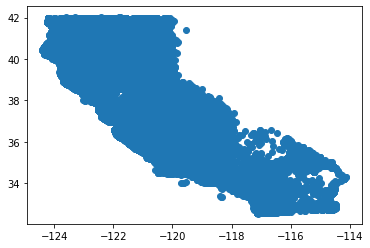

In [6]:
plt.scatter(df["LONGITUDE"], df["LATITUDE"])

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [22]:
model = SVC(gamma='scale', decision_function_shape='ovo', C=50, random_state=42, kernel='poly', verbose=True)
model.fit(Xtrain, ytrain)

[LibSVM]

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [23]:
preds = model.predict(Xtest)
acc = accuracy_score(ytest, preds)
acc

0.5645256229598844

In [24]:
preds

array(['B', 'A', 'B', ..., 'A', 'A', 'A'], dtype=object)

In [25]:
ytest

108361    A
15187     B
85137     B
33637     B
69868     A
96427     B
114461    B
112533    B
104943    A
134268    A
63932     A
158718    A
65206     A
83652     A
117594    B
71825     A
19369     B
31727     A
68276     A
122382    B
87770     B
170163    A
49881     A
109215    A
170828    A
66137     B
64484     B
157149    B
9053      A
40537     A
         ..
137254    B
109411    B
91319     B
24483     A
94674     B
88152     C
149736    B
42131     B
74629     B
29736     A
172612    D
43829     A
40929     A
63237     B
57349     A
145257    A
71064     A
109268    B
45166     A
61804     A
27308     B
61969     B
54281     F
52837     B
171041    B
10692     A
79810     B
33882     B
350       A
127679    B
Name: FIRE_SIZE_CLASS, Length: 56063, dtype: object